<center>

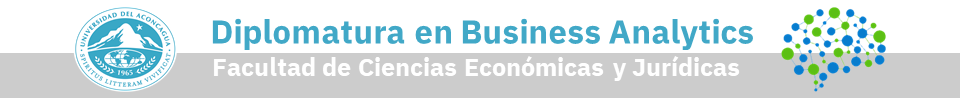

</center>

<center>
<font color="#41a8c7">
<h2><b>
Código Trabajo Final - Caso Rotación de Clientes - Customer Churn

</font>
</center>

## Descripción dataset

Data Description

7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

La deserción de clientes (también conocida como pérdida de clientes) es una de los mayores causas de pérdida de cualquier organización. Si pudiéramos averiguar por qué un cliente se va y cuándo se va con una precisión razonable, ayudaría enormemente a la organización a diseñar estrategias de fidelización.

# Carga de datos

In [1]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pycaret.classification.oop import *
LOGGER.disabled=True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/test.csv")

# Trabajo a realizar

Buscamos predecir si un cliente va a seguir siendo cliente o si va a abandonar la compañía este cuatrimestre.

Para ello voy a tratar de generar un modelo de aprendizaje supervisado, específicamente un algoritmo de clasificación.

La pregunta de negocio es una clasificación binaria y lo que voy a tratar de lograr es predecir si un cliente va a seguir con nuestra compañía o la va abandonar.

Esto nos puede servir para múltiples motivos, principalmente para enfocar campañas de marketing que nos permita prevenir el abandono de clientes o minimizar la ocurrencia de este tipo de hechos con baterías de acciones de UX.

A fin de realizar este trabajo voy a utilizar el data frame dado por Luca, voy a proceder a realizar un análisis exploratorio de datos, voy buscar y tratar datos nulos y duplicados, luego analizaré el data set columna por columna a fin de buscar anomalías. 
Para finalizar el trabajo voy a configurar un entorno de PyCaret, para poder generar el modelo y luego realizar la predicción correspondiente.
Veremos que sale

## Análisis exploratorio y limpieza de datos

In [5]:
train.shape

(5274, 32)

In [6]:
print(f"El dataframe tiene {list(train.shape)[0]} filas y {list(train.shape)[1]} columnas")

El dataframe tiene 5274 filas y 32 columnas


In [7]:
train.head(5)

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
0,5552,7838-LAZFO,1,United States,California,Hanford,93230,"36.29223, -119.622676",36.292230,-119.622676,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,NaN
1,5805,8189-DUKMV,1,United States,California,Rancho Cordova,95742,"38.591134, -121.161585",38.591134,-121.161585,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,NaN
2,2640,3758-CKOQL,1,United States,California,Valyermo,93563,"34.39583, -117.734568",34.395830,-117.734568,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,NaN
3,3976,5619-PTMIK,1,United States,California,Lemon Grove,91945,"32.733564, -117.033713",32.733564,-117.033713,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,NaN
4,6429,9115-YQHGA,1,United States,California,Lemoore,93245,"36.303666, -119.825657",36.303666,-119.825657,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,NaN


In [8]:
train.tail(5)

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
5269,1565,2277-AXSDC,1,United States,California,El Centro,92243,"32.770393, -115.60915",32.770393,-115.609150,...,No internet service,No internet service,One year,No,Bank transfer (automatic),19.75,624.15,No,4691,NaN
5270,4159,5895-QSXOD,1,United States,California,Alleghany,95910,"39.467828, -120.841386",39.467828,-120.841386,...,No,No,Month-to-month,No,Mailed check,70.05,657.50,No,3522,NaN
5271,3218,4626-GYCZP,1,United States,California,Eureka,95503,"40.737431, -124.108897",40.737431,-124.108897,...,Yes,Yes,Month-to-month,Yes,Electronic check,93.85,635.60,Yes,3506,Network reliability
5272,3409,4844-JJWUY,1,United States,California,San Francisco,94121,"37.776718, -122.495781",37.776718,-122.495781,...,No,Yes,Month-to-month,Yes,Electronic check,86.00,86.00,Yes,5359,Competitor made better offer
5273,4248,5996-NRVXR,1,United States,California,Los Alamitos,90720,"33.79499, -118.065591",33.794990,-118.065591,...,Yes,No,One year,Yes,Credit card (automatic),98.15,4116.80,No,4332,NaN


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5274 non-null   int64  
 1   CustomerID         5274 non-null   object 
 2   Count              5274 non-null   int64  
 3   Country            5274 non-null   object 
 4   State              5274 non-null   object 
 5   City               5274 non-null   object 
 6   Zip Code           5274 non-null   int64  
 7   Lat Long           5274 non-null   object 
 8   Latitude           5274 non-null   float64
 9   Longitude          5274 non-null   float64
 10  Gender             5274 non-null   object 
 11  Senior Citizen     5274 non-null   object 
 12  Partner            5274 non-null   object 
 13  Dependents         5274 non-null   object 
 14  Tenure Months      5274 non-null   int64  
 15  Phone Service      5274 non-null   object 
 16  Multiple Lines     5274 

In [10]:
train= train.drop(train.columns[[0]], axis='columns') #elimino la columna unnamed que aparentemente es un índice


In [11]:
train.Country.unique()  #el único país que analizamos es USA, puedo prescindir de esta columna

array(['United States'], dtype=object)

In [12]:
train.State.unique() # el único Estado que analizamos es California, puedo prescindir de esta columna

array(['California'], dtype=object)

In [13]:
train= train.drop(columns=['CustomerID','Count', 'Lat Long','Country','State','Churn Reason']) #dropeo más columnas

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               5274 non-null   object 
 1   Zip Code           5274 non-null   int64  
 2   Latitude           5274 non-null   float64
 3   Longitude          5274 non-null   float64
 4   Gender             5274 non-null   object 
 5   Senior Citizen     5274 non-null   object 
 6   Partner            5274 non-null   object 
 7   Dependents         5274 non-null   object 
 8   Tenure Months      5274 non-null   int64  
 9   Phone Service      5274 non-null   object 
 10  Multiple Lines     5274 non-null   object 
 11  Internet Service   5274 non-null   object 
 12  Online Security    5274 non-null   object 
 13  Online Backup      5274 non-null   object 
 14  Device Protection  5274 non-null   object 
 15  Tech Support       5274 non-null   object 
 16  Streaming TV       5274 

In [15]:
#renombro las columnas para hacer el dataset más manipulable
lista = ["Ciudad", "Codigo_Postal", "Latitud", "Longitud", "Genero", "Jubilado", "Pareja", "Personas_a_cargo", "Meses_cliente", "Línea_Telefónica","Líneas_Múltiples", "Servicio_de_Internet", "Seguridad_online", "Respaldo_Seguridad","Protección_Equipos", "Soporte", "Streaming_TV", "Streaming_Movies", "Contrato", "Factura_Online", "Modo_Pago", "Cargos_Mensuales","Total_Cargos","Churn_Label", "Valor_Cliente"]
train.columns = lista
train.head()

,Ciudad,Codigo_Postal,Latitud,Longitud,Genero,Jubilado,Pareja,Personas_a_cargo,Meses_cliente,Línea_Telefónica,...,Soporte,Streaming_TV,Streaming_Movies,Contrato,Factura_Online,Modo_Pago,Cargos_Mensuales,Total_Cargos,Churn_Label,Valor_Cliente
0,Hanford,93230,36.292230,-119.622676,Male,No,Yes,No,45,Yes,...,No,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192
1,Rancho Cordova,95742,38.591134,-121.161585,Female,No,Yes,No,4,Yes,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233
2,Valyermo,93563,34.395830,-117.734568,Female,No,Yes,No,59,Yes,...,Yes,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620
3,Lemon Grove,91945,32.733564,-117.033713,Female,No,Yes,No,46,Yes,...,No,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358
4,Lemoore,93245,36.303666,-119.825657,Male,No,No,No,40,Yes,...,Yes,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355


In [16]:
train.isna().sum().sort_values() #busco nulos, aparentemente el dataframe no tiene nulos, raro

Ciudad                  0
Total_Cargos            0
Cargos_Mensuales        0
Modo_Pago               0
Factura_Online          0
Contrato                0
Streaming_Movies        0
Streaming_TV            0
Soporte                 0
Protección_Equipos      0
Respaldo_Seguridad      0
Churn_Label             0
Seguridad_online        0
Líneas_Múltiples        0
Línea_Telefónica        0
Meses_cliente           0
Personas_a_cargo        0
Pareja                  0
Jubilado                0
Genero                  0
Longitud                0
Latitud                 0
Codigo_Postal           0
Servicio_de_Internet    0
Valor_Cliente           0
dtype: int64

In [17]:
train.drop_duplicates(inplace=True) #dropeo duplicados

In [18]:
train.dropna(axis=0, inplace = True) #dropeo las filas con valores faltantes

In [19]:
train.shape #quedó igual el df

(5274, 25)

## Análisis Estadístico de las variables

In [20]:
round(train.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
Codigo_Postal,5274.0,93511.146,1870.032,90001.000,92086.000,93550.500,95350.000,96161.000
Latitud,5274.0,36.277,2.453,32.556,34.031,36.319,38.225,41.962
Longitud,5274.0,-119.788,2.166,-124.301,-121.818,-119.718,-118.040,-114.193
Meses_cliente,5274.0,32.458,24.714,1.000,9.000,29.000,56.000,72.000
Cargos_Mensuales,5274.0,64.526,30.095,18.250,35.213,70.300,89.800,118.750
Total_Cargos,5274.0,2277.734,2274.193,18.850,389.138,1378.600,3803.725,8684.800
Valor_Cliente,5274.0,4402.845,1184.379,2003.000,3470.250,4521.000,5387.000,6499.000


In [21]:
train.describe(include="object").T

,count,unique,top,freq
Ciudad,5274,1127,Los Angeles,237
Genero,5274,2,Male,2662
Jubilado,5274,2,No,4417
Pareja,5274,2,No,2711
Personas_a_cargo,5274,2,No,4056
Línea_Telefónica,5274,2,Yes,4750
Líneas_Múltiples,5274,3,No,2554
Servicio_de_Internet,5274,3,Fiber optic,2296
Seguridad_online,5274,3,No,2608
Respaldo_Seguridad,5274,3,No,2279


In [117]:
train['Churn_Label'].value_counts().sort_values(ascending=False)

0    3863
1    1411
Name: Churn_Label, dtype: int64

## Visualización datos únicos por columna 

A fin de disminuir la cantidad de variables respuesta en cada columna voy concentrarme en lo que para mí sería la pregunta de fondo, por ejemplo ¿tiene soporte? Sí o No, independientemente de la causa por la que no lo tiene en el primer caso no tiene soporte porque no tiene internet. Además de que es lo que indica el detalle de las columnas al inicio del ejercicio y luego me va a facilitar el label encoding.
Realizo el mismo tratamiento para el resto de las columnas.

### Columna Jubilado

In [22]:
px.histogram(train,
             x = train.Jubilado,
             marginal="violin",
             template = "gridon")

### Columna personas a cargo

In [23]:
px.histogram(train,
             x = train.Personas_a_cargo,
             marginal="violin",
             template = "gridon")

### Columna Soporte

In [24]:
train.Soporte.unique()

array(['No', 'No internet service', 'Yes'], dtype=object)

In [25]:
train['Soporte'] = train['Soporte'].replace(['No internet service'],'No')

In [26]:
px.histogram(train,
             x = train.Soporte,
             marginal="violin",
             template = "gridon")

### Columna Líneas Múltiples

In [27]:
train.Líneas_Múltiples.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [28]:
train['Líneas_Múltiples'] = train['Líneas_Múltiples'].replace(['No phone service'],'No')

In [29]:
px.histogram(train,
             x = train.Líneas_Múltiples,
             marginal="violin",
             template = "gridon")

### Columna Servicio de Internet

In [30]:
train.Servicio_de_Internet.unique()

array(['DSL', 'No', 'Fiber optic'], dtype=object)

In [31]:
px.histogram(train,
             x = train.Servicio_de_Internet,
             marginal="violin",
             template = "gridon")

In [32]:
train['Servicio_de_Internet'] = train['Servicio_de_Internet'].replace(['DSL','Fiber optic'],'Yes')

### Columna seguridad online

In [33]:
train.Seguridad_online.unique()

array(['Yes', 'No internet service', 'No'], dtype=object)

In [34]:
train['Seguridad_online'] = train['Seguridad_online'].replace(['No internet service'],'No')

In [35]:
px.histogram(train,
             x = train.Seguridad_online,
             marginal="violin",
             template = "gridon")

### Columna Respaldo Seguridad

In [36]:
train.Respaldo_Seguridad.unique()

array(['Yes', 'No internet service', 'No'], dtype=object)

In [37]:
train['Respaldo_Seguridad'] = train['Respaldo_Seguridad'].replace(['No internet service'],'No')

In [38]:
px.histogram(train,
             x = train.Respaldo_Seguridad,
             marginal="violin",
             template = "gridon")

###Columnna Protección Equipos

In [39]:
train.Protección_Equipos.unique()

array(['Yes', 'No internet service', 'No'], dtype=object)

In [40]:
train['Protección_Equipos'] = train['Protección_Equipos'].replace(['No internet service'],'No')

In [41]:
px.histogram(train,
             x = train.Protección_Equipos,
             marginal="violin",
             template = "gridon")

### Columna Streaming TV

In [42]:
train.Streaming_TV.unique()

array(['Yes', 'No internet service', 'No'], dtype=object)

In [43]:
train['Streaming_TV'] = train['Streaming_TV'].replace(['No internet service'],'No')

In [44]:
px.histogram(train,
             x = train.Streaming_TV,
             marginal="violin",
             template = "gridon")

### Columna Streaming Movies

In [45]:
train.Streaming_Movies.unique()

array(['Yes', 'No internet service', 'No'], dtype=object)

In [46]:
train['Streaming_Movies'] = train['Streaming_Movies'].replace(['No internet service'],'No')

In [47]:
px.histogram(train,
             x = train.Streaming_Movies,
             marginal="violin",
             template = "gridon")

### Columna Contrato

In [48]:
train.Contrato.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [49]:
px.histogram(train,
             x = train.Contrato,
             marginal="violin",
             template = "gridon")

### Columna factura online

In [50]:
train.Factura_Online.unique()

array(['No', 'Yes'], dtype=object)

In [51]:
px.histogram(train,
             x = train.Factura_Online,
             marginal="violin",
             template = "gridon")

Si queremos ser una empresa sustentable no podemos seguir imprimiendo facturas, hay que hechar al gerente de costos que sigue gastando papel.

### Columna modo de pago

In [52]:
train.Modo_Pago.unique()

array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [53]:
px.histogram(train,
             x = train.Modo_Pago,
             marginal="violin",
             template = "gridon")

Típico de USA la mayoría de los pagos se realiza con cheques, a fin de atar más a los clientes deberíamos lograr una migración a medios de pago automáticos, eso también ayudaría a que antes de que se quieran dar de baja les podamos ofrecer algún tipo de promoción.

## Breve análisis variables númericas

In [54]:
px.box(train,
       x = train.Meses_cliente,
       template = "gridon")

In [55]:
px.box(train,
       x = train.Cargos_Mensuales,
       template = "gridon")

In [56]:
px.box(train,
       x = train.Total_Cargos,
       template = "gridon")

In [57]:
def cat_cliente(Valor_Cliente):  #hago una pequeña segmentación de clientes en base al Customer Lifetime Value.
    if Valor_Cliente < 3000:
        return "Cliente Regular"
    elif Valor_Cliente < 5000:
        return "Cliente Platinum"
    else:
        return "Cliente Black" 

In [58]:
train["Cat_cliente"] = train.Valor_Cliente.apply(cat_cliente)


In [59]:
px.scatter(train,
           x = train.Meses_cliente,
           y = train.Cargos_Mensuales,
           color = "Cat_cliente",
           hover_name = "Cat_cliente",
           trendline_color_override = 'red',
           template = "gridon")

In [60]:
train.head(10)

,Ciudad,Codigo_Postal,Latitud,Longitud,Genero,Jubilado,Pareja,Personas_a_cargo,Meses_cliente,Línea_Telefónica,...,Streaming_TV,Streaming_Movies,Contrato,Factura_Online,Modo_Pago,Cargos_Mensuales,Total_Cargos,Churn_Label,Valor_Cliente,Cat_cliente
0,Hanford,93230,36.292230,-119.622676,Male,No,Yes,No,45,Yes,...,Yes,Yes,One year,No,Bank transfer (automatic),78.80,3597.50,No,4192,Cliente Platinum
1,Rancho Cordova,95742,38.591134,-121.161585,Female,No,Yes,No,4,Yes,...,No,No,One year,No,Bank transfer (automatic),20.50,79.05,No,3233,Cliente Platinum
2,Valyermo,93563,34.395830,-117.734568,Female,No,Yes,No,59,Yes,...,No,Yes,One year,Yes,Credit card (automatic),107.00,6152.30,No,4620,Cliente Platinum
3,Lemon Grove,91945,32.733564,-117.033713,Female,No,Yes,No,46,Yes,...,No,No,Month-to-month,No,Electronic check,53.10,2459.80,No,3358,Cliente Platinum
4,Lemoore,93245,36.303666,-119.825657,Male,No,No,No,40,Yes,...,No,No,Month-to-month,Yes,Electronic check,51.10,2092.90,No,3355,Cliente Platinum
5,Geyserville,95441,38.731771,-123.064272,Male,No,Yes,Yes,10,No,...,No,Yes,Two year,No,Credit card (automatic),53.70,521.00,No,5671,Cliente Black
6,Nice,95464,39.123340,-122.838198,Male,No,No,No,3,Yes,...,No,No,Month-to-month,Yes,Electronic check,49.15,169.05,Yes,5598,Cliente Black
7,Brisbane,94005,37.684694,-122.407120,Male,No,No,No,1,Yes,...,No,No,Month-to-month,No,Mailed check,19.40,19.40,Yes,4152,Cliente Platinum
8,San Francisco,94103,37.773147,-122.411287,Male,No,No,No,4,Yes,...,Yes,No,Month-to-month,Yes,Electronic check,56.40,234.85,No,5344,Cliente Black
9,Mariposa,95338,37.526791,-119.994370,Female,No,No,No,1,Yes,...,Yes,No,Month-to-month,No,Electronic check,84.30,84.30,Yes,2172,Cliente Regular


En el gráfico scatter se ve una clara tendencia de que nuestro clientes Black son los que más tiempo llevan en la compañía y los que más cargos mensuales tienen.

Los clientes platinum están muchos más distribuidos en lo referido a cargos mensuales como al tiempo de clientes

Respecto a los clientes regulares, también están distribuidos en lo que respecta a cargos mensuales, pero son todos clientes con menos meses.

In [61]:
train['Cat_cliente'].value_counts().sort_values(ascending=False)

Cliente Platinum    2443
Cliente Black       1946
Cliente Regular      885
Name: Cat_cliente, dtype: int64

Aparentemente tenemos una buena cantidad de clientes que están hace tiempo en la empresa y que tienen un buen score, deberíamos buscar estrategias de retención de los mismos.

## Mapa

Podemos ver la dispersión geográfica de nuestros clientes

In [62]:
fig = px.scatter_mapbox(train,  #gracias Gustavo por el mapa!!!
                        lat="Latitud", 
                        lon="Longitud",  
                        hover_data=["Ciudad", "Valor_Cliente"],
                        color = "Cat_cliente",
                        color_discrete_sequence=px.colors.qualitative.G10,
                     
                        zoom=5
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

##Matriz de Correlación

In [63]:
train= train.drop(columns=['Codigo_Postal']) #dropeo el código postal dado que recién ahora me doy cuenta que no lo necesito

In [64]:
corr = round(train.corr(),4)

In [65]:
px.imshow(corr,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

Hay una correlación directa entre el valor del cliente y el total de cargos y los meses que llevan en la compañía, esto es relativamente obvio. 
Podría dropear las columnas que tienen una alta correlación, pero no quiero romper el modelo

In [66]:
#train= train.drop(columns=['Meses_cliente','Total_Cargos']) 

##Análisis bivariado Gráfico de correlación con las variables categóricas

In [67]:
categorical_features = ['Genero', 'Jubilado','Pareja','Personas_a_cargo','Línea_Telefónica','Líneas_Múltiples','Servicio_de_Internet','Seguridad_online','Respaldo_Seguridad','Protección_Equipos','Soporte','Streaming_TV', 'Streaming_Movies','Factura_Online','Churn_Label']
numerical_features = ['Latitud', 'Longitud','Cargos_Mensuales', 'Valor_Cliente']

In [68]:
corr_2 = round(train[categorical_features + numerical_features].corr(method='spearman'), 4)

In [69]:
px.imshow(corr_2,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

## Codificación de variables

In [70]:
## Utilizamos Label encoding para las variables categoricas de dos valores (Si/No)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Genero', 'Jubilado','Pareja','Personas_a_cargo','Línea_Telefónica','Líneas_Múltiples','Servicio_de_Internet','Seguridad_online','Respaldo_Seguridad','Protección_Equipos','Soporte','Streaming_TV', 'Streaming_Movies','Factura_Online','Churn_Label' ]
for col in columns:
    train[col] = le.fit_transform(train[col])

In [71]:
train = pd.get_dummies(train, columns = ['Contrato','Modo_Pago','Cat_cliente'])

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 0 to 5273
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ciudad                               5274 non-null   object 
 1   Latitud                              5274 non-null   float64
 2   Longitud                             5274 non-null   float64
 3   Genero                               5274 non-null   int64  
 4   Jubilado                             5274 non-null   int64  
 5   Pareja                               5274 non-null   int64  
 6   Personas_a_cargo                     5274 non-null   int64  
 7   Meses_cliente                        5274 non-null   int64  
 8   Línea_Telefónica                     5274 non-null   int64  
 9   Líneas_Múltiples                     5274 non-null   int64  
 10  Servicio_de_Internet                 5274 non-null   int64  
 11  Seguridad_online              

In [73]:
train.head(5)

,Ciudad,Latitud,Longitud,Genero,Jubilado,Pareja,Personas_a_cargo,Meses_cliente,Línea_Telefónica,Líneas_Múltiples,...,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Modo_Pago_Bank transfer (automatic),Modo_Pago_Credit card (automatic),Modo_Pago_Electronic check,Modo_Pago_Mailed check,Cat_cliente_Cliente Black,Cat_cliente_Cliente Platinum,Cat_cliente_Cliente Regular
0,Hanford,36.292230,-119.622676,1,0,1,0,45,1,0,...,0,1,0,1,0,0,0,0,1,0
1,Rancho Cordova,38.591134,-121.161585,0,0,1,0,4,1,0,...,0,1,0,1,0,0,0,0,1,0
2,Valyermo,34.395830,-117.734568,0,0,1,0,59,1,1,...,0,1,0,0,1,0,0,0,1,0
3,Lemon Grove,32.733564,-117.033713,0,0,1,0,46,1,1,...,1,0,0,0,0,1,0,0,1,0
4,Lemoore,36.303666,-119.825657,1,0,0,0,40,1,0,...,1,0,0,0,0,1,0,0,1,0


## Observaciones antes del modelado

Me sorprenden los números de la empresa, hay mucha gente que contrata más de un servicio con la misma, habría que ver la forma de paquetizar la línea de productos.

El segmento que apuntas es claramente poco 'viejo friendly' dada los pocos clientes que tenemos mayores a 65 y también estamos poco enfocados en las clientes con personas a cargo, ahí podríamos promocionar todos lo que es streaming, sobre todo a los que tienen niños chicos.

El resto de las observaciones que consideré relevantes las fui realizando debajo de los gráficos a fin de no olvidarme.


## Creación Modelo de clasificación

In [74]:
from pycaret.classification import *


## Separo el modelo

In [75]:
datos = train.sample(frac=0.95, random_state=786)

In [76]:
datos_novistos = train.drop(datos.index)

In [77]:
datos.reset_index(inplace=True, drop=True)
datos_novistos.reset_index(inplace=True, drop=True)

### Configuro el setup

In [78]:
model_setup = setup(data= datos, 
                    target='Churn_Label', 
                    session_id=123,
                    normalize = True,
                    transformation = True,)

,Description,Value
0,Session id,123
1,Target,Churn_Label
2,Target type,Binary
3,Original data shape,"(5010, 32)"
4,Transformed data shape,"(5010, 32)"
5,Transformed train set shape,"(3506, 32)"
6,Transformed test set shape,"(1504, 32)"
7,Numeric features,30
8,Categorical features,1
9,Preprocess,True


### Comparo modelos

In [79]:
mejor_modelo=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8183,0.8630,0.5800,0.6913,0.6300,0.5110,0.5149,0.0920
ridge,Ridge Classifier,0.8155,0.0000,0.5374,0.7028,0.6085,0.4907,0.4986,0.1360
lr,Logistic Regression,0.8152,0.8674,0.5779,0.6835,0.6256,0.5042,0.5077,0.8530
gbc,Gradient Boosting Classifier,0.8049,0.8567,0.5374,0.6677,0.5953,0.4688,0.4738,0.5330
rf,Random Forest Classifier,0.8018,0.8566,0.5107,0.6709,0.5792,0.4528,0.4604,0.5550
ada,Ada Boost Classifier,0.8012,0.8512,0.5736,0.6459,0.6065,0.4743,0.4765,0.2290
lightgbm,Light Gradient Boosting Machine,0.7975,0.8466,0.5309,0.6514,0.5842,0.4522,0.4569,0.2160
et,Extra Trees Classifier,0.7961,0.8443,0.5140,0.6508,0.5731,0.4420,0.4479,0.3960
svm,SVM - Linear Kernel,0.7844,0.0000,0.4864,0.6261,0.5399,0.4046,0.4134,0.1480
nb,Naive Bayes,0.7670,0.8504,0.7826,0.5453,0.6426,0.4779,0.4952,0.1450


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [80]:
print(mejor_modelo)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


El mejor modelo es el de regresión logística, si lo evaluamos por accuracy. 
Sin embargo el recall de este modelo es bastante bajo lo que nos indica que hay muchos falsos negativos.

### Creación del modelo

Elijo uno de los modelos que no es necesariamente el óptimo a fin de ver si puedo mejorarlo.

In [81]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7863,0.8348,0.5000,0.6267,0.5562,0.4178,0.4225
1,0.8006,0.8478,0.5213,0.6622,0.5833,0.4547,0.4603
2,0.8376,0.8932,0.5851,0.7534,0.6587,0.5543,0.5620
3,0.7721,0.8334,0.5106,0.5854,0.5455,0.3943,0.3959
4,0.8148,0.8464,0.5106,0.7164,0.5963,0.4805,0.4921
5,0.7806,0.8144,0.4468,0.6269,0.5217,0.3846,0.3938
6,0.7857,0.8680,0.4255,0.6557,0.5161,0.3864,0.4013
7,0.8143,0.8748,0.5319,0.7042,0.6061,0.4876,0.4959
8,0.8029,0.8612,0.5054,0.6714,0.5767,0.4515,0.4593


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Afinando el modelo

In [82]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7749,0.8348,0.4468,0.6087,0.5153,0.3732,0.3808
1,0.8034,0.8492,0.4787,0.6923,0.5660,0.4444,0.4570
2,0.8006,0.8704,0.5638,0.6463,0.6023,0.4700,0.4720
3,0.7806,0.8272,0.6809,0.5766,0.6244,0.4710,0.4742
4,0.7863,0.8490,0.4362,0.6508,0.5223,0.3915,0.4045
5,0.7436,0.7973,0.5638,0.5196,0.5408,0.3634,0.3639
6,0.8000,0.8495,0.5000,0.6714,0.5732,0.4462,0.4545
7,0.8286,0.8734,0.5426,0.7500,0.6296,0.5218,0.5334
8,0.8000,0.8513,0.6989,0.6075,0.6500,0.5110,0.5134


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


En este caso en particular la afinación del modelo no devolvió ninguna mejora en las métricas

## Creo otro modelo

In [83]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7863,0.8509,0.5213,0.6203,0.5665,0.4261,0.4289
1,0.8120,0.8605,0.5745,0.6750,0.6207,0.4968,0.4996
2,0.8262,0.8971,0.5532,0.7324,0.6303,0.5196,0.5283
3,0.7949,0.8469,0.5851,0.6250,0.6044,0.4661,0.4666
4,0.8234,0.8568,0.5745,0.7105,0.6353,0.5205,0.5256
5,0.7949,0.8292,0.5319,0.6410,0.5814,0.4471,0.4505
6,0.8229,0.8809,0.5851,0.7051,0.6395,0.5235,0.5275
7,0.8229,0.8775,0.6170,0.6905,0.6517,0.5334,0.5349
8,0.8200,0.8644,0.5591,0.7027,0.6228,0.5066,0.5123


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [84]:
best_lr_threshold = optimize_threshold(lr)

In [85]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7977,0.8510,0.5426,0.6456,0.5896,0.4567,0.4598
1,0.8177,0.8588,0.5745,0.6923,0.6279,0.5085,0.5124
2,0.8405,0.8969,0.6064,0.7500,0.6706,0.5669,0.5725
3,0.7920,0.8444,0.5851,0.6180,0.6011,0.4606,0.4609
4,0.8376,0.8545,0.6277,0.7284,0.6743,0.5669,0.5697
5,0.8006,0.8281,0.5426,0.6538,0.5930,0.4625,0.4660
6,0.8171,0.8812,0.5638,0.6974,0.6235,0.5046,0.5095
7,0.8200,0.8760,0.6064,0.6867,0.6441,0.5242,0.5260
8,0.8229,0.8636,0.5591,0.7123,0.6265,0.5126,0.5191


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


En este caso si vemos una mejora en la mayoría de las métricas pero es insignificante, baja muy poco el AUC.

## Graficando el modelo

### AUC Plot

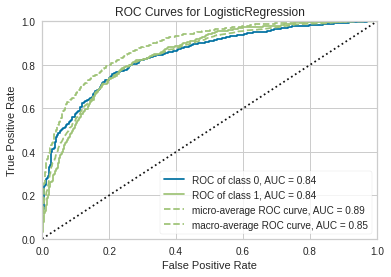

In [86]:
plot_model(tuned_lr, plot = 'auc')

El AUC es 0.87, significa que existe un 87% de probabilidad de la que la predicción sea correcta, el cual es un valor aceptable o una predicción buena.

### Precision-recall curve

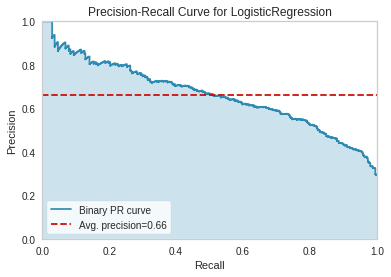

In [87]:
plot_model(tuned_lr, plot = 'pr')

El valor de precision promedio 0.69 indica que en este modelo estaría bastante optimizado el valor de precisión y recall, o por lo menos mucho mejor que los datasets que des

### Feature importance

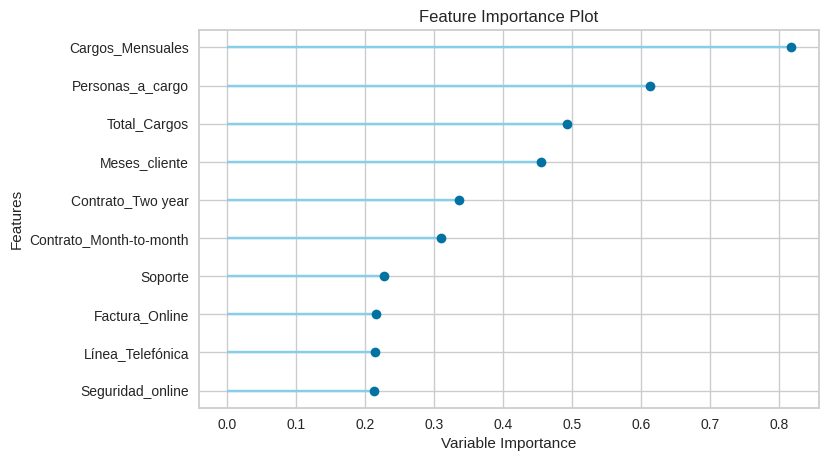

In [88]:
plot_model(tuned_lr, plot='feature')

### Confusion matrix

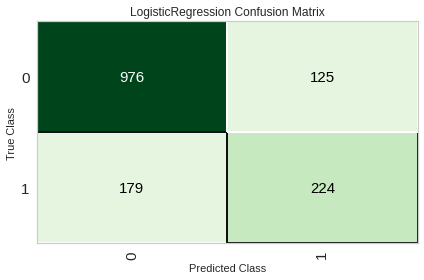

In [89]:
plot_model(tuned_lr, plot = 'confusion_matrix')

Verdaderos Positivos: 1046
Verdaderos Negativos: 258
Falsos Positivos: 166
Falsos Negativos: 113

Total datos sobre los que testeo el modelo 1538

## Evaluación del modelo

In [90]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalizo el modelo

In [91]:
final_lr = finalize_model(tuned_lr)

In [92]:
print(final_lr)

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Latitud', 'Longitud', 'Genero',
                                             'Jubilado', 'Pareja',
                                             'Personas_a_cargo',
                                             'Meses_cliente',
                                             'Línea_Telefónica',
                                             'Líneas_Múltiples',
                                             'Servicio_de_Internet',
                                             'Seguridad_online',
                                             'Respaldo_Seguridad',
                                             'Protección_Equipos', 'Soporte',
                                             'Streaming_TV', 'Str...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=Stan

## Predicciones con el modelo

In [93]:
predict_model(final_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8039,0.8487,0.5583,0.6579,0.6040,0.4748,0.4777


,Ciudad,Latitud,Longitud,Genero,Jubilado,Pareja,Personas_a_cargo,Meses_cliente,Línea_Telefónica,Líneas_Múltiples,...,Modo_Pago_Bank transfer (automatic),Modo_Pago_Credit card (automatic),Modo_Pago_Electronic check,Modo_Pago_Mailed check,Cat_cliente_Cliente Black,Cat_cliente_Cliente Platinum,Cat_cliente_Cliente Regular,Churn_Label,prediction_label,prediction_score
3506,-1.218318,0.703947,-0.642445,-1.006869,2.243752,1.030705,-0.550328,0.887621,0.328239,-0.863722,...,-0.534915,-0.525644,-0.720918,1.888148,1.321987,-0.934807,-0.452103,0,0,0.9780
3507,0.357025,0.994877,-0.784916,0.993178,-0.445682,-0.970210,-0.550328,-0.734639,0.328239,1.157780,...,-0.534915,1.902429,-0.720918,-0.529619,1.321987,-0.934807,-0.452103,1,0,0.8039
3508,1.025209,1.811556,-0.375599,-1.006869,-0.445682,-0.970210,-0.550328,-1.500516,0.328239,1.157780,...,-0.534915,-0.525644,1.387121,-0.529619,1.321987,-0.934807,-0.452103,0,1,0.7396
3509,0.274327,0.906403,-1.440843,0.993178,-0.445682,-0.970210,-0.550328,-0.217457,0.328239,-0.863722,...,-0.534915,1.902429,-0.720918,-0.529619,1.321987,-0.934807,-0.452103,0,0,0.9013
3510,0.274327,-0.778029,0.606818,0.993178,-0.445682,-0.970210,-0.550328,-0.864581,-3.046560,-0.863722,...,-0.534915,-0.525644,1.387121,-0.529619,1.321987,-0.934807,-0.452103,0,1,0.5166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,0.363440,-0.933707,0.667892,0.993178,-0.445682,1.030705,-0.550328,1.331856,0.328239,1.157780,...,-0.534915,1.902429,-0.720918,-0.529619,1.321987,-0.934807,-0.452103,0,0,0.9383
5006,0.274327,0.923909,-0.684120,0.993178,-0.445682,1.030705,-0.550328,-0.616156,0.328239,-0.863722,...,-0.534915,-0.525644,1.387121,-0.529619,-0.756437,1.069739,-0.452103,1,1,0.5258
5007,1.397505,1.764058,-0.196838,-1.006869,-0.445682,1.030705,1.817097,-1.500516,-3.046560,-0.863722,...,1.869458,-0.525644,-0.720918,-0.529619,-0.756437,1.069739,-0.452103,0,0,0.8185
5008,0.522764,-0.854277,1.145559,0.993178,-0.445682,-0.970210,1.817097,-0.506673,0.328239,1.157780,...,-0.534915,-0.525644,1.387121,-0.529619,-0.756437,1.069739,-0.452103,0,0,0.6646


## Predicciones sobre datos no vistos

In [94]:
predict_novistos = predict_model(final_lr, data= datos_novistos)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8030,0.8459,0.5286,0.6607,0.5873,0.4600,0.4650


Las predicciones sobre los datos no vistos no son del todo alentadoras, empeoraron todas las métricas

# Datos Prueba

## Limpieza y homogeneización de los datos de prueba

In [95]:
test.shape

(1758, 32)

In [96]:
test= test.drop(test.columns[[0]], axis='columns') #elimino la columna unnamed que aparentemente es un índice

In [97]:
test= test.drop(columns=['CustomerID','Count', 'Lat Long','Country','State','Churn Reason']) #dropeo más columnas

In [98]:
#renombro las columnas para hacer el dataset más manipulable
lista = ["Ciudad", "Codigo_Postal", "Latitud", "Longitud", "Genero", "Jubilado", "Pareja", "Personas_a_cargo", "Meses_cliente", "Línea_Telefónica","Líneas_Múltiples", "Servicio_de_Internet", "Seguridad_online", "Respaldo_Seguridad","Protección_Equipos", "Soporte", "Streaming_TV", "Streaming_Movies", "Contrato", "Factura_Online", "Modo_Pago", "Cargos_Mensuales","Total_Cargos","Churn_Label", "Valor_Cliente"]
test.columns = lista
test.head()

,Ciudad,Codigo_Postal,Latitud,Longitud,Genero,Jubilado,Pareja,Personas_a_cargo,Meses_cliente,Línea_Telefónica,...,Soporte,Streaming_TV,Streaming_Movies,Contrato,Factura_Online,Modo_Pago,Cargos_Mensuales,Total_Cargos,Churn_Label,Valor_Cliente
0,Frazier Park,93225,34.827662,-118.999073,Female,No,Yes,No,9,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,No,2205
1,Napa,94558,38.489789,-122.270110,Male,No,Yes,No,63,Yes,...,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80,No,4604
2,Morgan Hill,95037,37.161544,-121.649371,Male,Yes,No,No,1,No,...,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.10,Yes,5437
3,Carnelian Bay,96140,39.227434,-120.091806,Female,No,Yes,No,13,Yes,...,No,Yes,No,Month-to-month,No,Electronic check,94.10,1215.60,Yes,2973
4,Korbel,95550,40.766600,-123.804580,Female,No,Yes,No,4,Yes,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35,Yes,4133


In [99]:
train.isna().sum().sort_values() #busco nulos, aparentemente el dataframe no tiene nulos, raro

Ciudad                                 0
Cat_cliente_Cliente Black              0
Modo_Pago_Mailed check                 0
Modo_Pago_Electronic check             0
Modo_Pago_Credit card (automatic)      0
Modo_Pago_Bank transfer (automatic)    0
Contrato_Two year                      0
Contrato_One year                      0
Contrato_Month-to-month                0
Valor_Cliente                          0
Churn_Label                            0
Total_Cargos                           0
Cargos_Mensuales                       0
Factura_Online                         0
Streaming_Movies                       0
Streaming_TV                           0
Soporte                                0
Protección_Equipos                     0
Respaldo_Seguridad                     0
Seguridad_online                       0
Servicio_de_Internet                   0
Líneas_Múltiples                       0
Línea_Telefónica                       0
Meses_cliente                          0
Personas_a_cargo

In [100]:
train.drop_duplicates(inplace=True) #dropeo duplicados


In [101]:
train.dropna(axis=0, inplace = True) #dropeo las filas con valores faltantes

In [102]:
test.shape #seguimos igual

(1758, 25)

## Análisis Estadístico

In [103]:
round(test.describe(),3).T #El análisis de variables estadísticas del conjunto de prueba arroja datos similares a los datos de entrenamiento

,count,mean,std,min,25%,50%,75%,max
Codigo_Postal,1758.0,93558.693,1851.974,90001.000,92109.250,93596.000,95354.750,96150.000
Latitud,1758.0,36.303,2.465,32.556,34.029,36.521,38.232,41.962
Longitud,1758.0,-119.834,2.132,-124.301,-121.809,-119.762,-118.049,-114.365
Meses_cliente,1758.0,32.313,24.038,1.000,10.000,29.000,54.000,72.000
Cargos_Mensuales,1758.0,65.614,30.053,18.700,39.125,70.800,90.350,118.600
Total_Cargos,1758.0,2300.001,2244.918,18.800,435.375,1462.750,3741.338,8547.150
Valor_Cliente,1758.0,4397.246,1176.825,2003.000,3470.000,4550.500,5365.500,6500.000


In [104]:
test.describe(include="object").T

,count,unique,top,freq
Ciudad,1758,824,Los Angeles,67
Genero,1758,2,Male,887
Jubilado,1758,2,No,1473
Pareja,1758,2,No,928
Personas_a_cargo,1758,2,No,1356
Línea_Telefónica,1758,2,Yes,1602
Líneas_Múltiples,1758,3,No,831
Servicio_de_Internet,1758,3,Fiber optic,800
Seguridad_online,1758,3,No,889
Respaldo_Seguridad,1758,3,No,808


##Tareas previas al label encoding

In [105]:
test['Soporte'] = test['Soporte'].replace(['No internet service'],'No')
test['Líneas_Múltiples'] = test['Líneas_Múltiples'].replace(['No phone service'],'No')
test['Servicio_de_Internet'] = test['Servicio_de_Internet'].replace(['DSL','Fiber optic'],'Yes')
test['Seguridad_online'] = test['Seguridad_online'].replace(['No internet service'],'No')
test['Respaldo_Seguridad'] = test['Respaldo_Seguridad'].replace(['No internet service'],'No')
test['Protección_Equipos'] = test['Protección_Equipos'].replace(['No internet service'],'No')
test['Streaming_TV'] = test['Streaming_TV'].replace(['No internet service'],'No')
test['Streaming_Movies'] = test['Streaming_Movies'].replace(['No internet service'],'No')



In [106]:
#def cat_cliente(Valor_Cliente):  #hago una pequeña segmentación de clientes en base al Customer Lifetime Value.
#    if Valor_Cliente < 3000:
#        return "Cliente Regular"
#    elif Valor_Cliente < 5000:
#        return "Cliente Platinum"
#    else:
#        return "Cliente Black" 

In [107]:
test["Cat_cliente"] = test.Valor_Cliente.apply(cat_cliente) #incorporo la columna de segmentación de clientes

In [108]:
test['Cat_cliente'].value_counts().sort_values(ascending=False)

Cliente Platinum    843
Cliente Black       626
Cliente Regular     289
Name: Cat_cliente, dtype: int64

## Codificación de variables

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Genero', 'Jubilado','Pareja','Personas_a_cargo','Línea_Telefónica','Líneas_Múltiples','Servicio_de_Internet','Seguridad_online','Respaldo_Seguridad','Protección_Equipos','Soporte','Streaming_TV', 'Streaming_Movies','Factura_Online','Churn_Label' ]
for col in columns:
    test[col] = le.fit_transform(test[col])

In [110]:
test = pd.get_dummies(test, columns = ['Contrato','Modo_Pago','Cat_cliente'])

In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ciudad                               1758 non-null   object 
 1   Codigo_Postal                        1758 non-null   int64  
 2   Latitud                              1758 non-null   float64
 3   Longitud                             1758 non-null   float64
 4   Genero                               1758 non-null   int64  
 5   Jubilado                             1758 non-null   int64  
 6   Pareja                               1758 non-null   int64  
 7   Personas_a_cargo                     1758 non-null   int64  
 8   Meses_cliente                        1758 non-null   int64  
 9   Línea_Telefónica                     1758 non-null   int64  
 10  Líneas_Múltiples                     1758 non-null   int64  
 11  Servicio_de_Internet          

In [112]:
test= test.drop(columns=['Codigo_Postal']) #dropeo el código postal dado que recién ahora me doy cuenta que no lo necesito

##Predicción con el modelo

In [113]:
test_predictions = predict_model(final_lr, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8089,0.8575,0.5240,0.6704,0.5882,0.4662,0.4722


Bajaron los resultados de las métricas del modelo cuando lo utilizamos sobre los datos de prueba, en todos los aspectos. En este caso la capacidad para predecir del modelo es aceptable.
Por otra parte a la hora de predecir tenemos un recall del 0.5240, lo que significa que hay muchos 'falsos negativos', es decir que el modelo es capaz de identificar poco más de la mitad de los clientes que quieren seguir contando con nuestros servicios.

In [114]:
test_predictions.head()

,Ciudad,Latitud,Longitud,Genero,Jubilado,Pareja,Personas_a_cargo,Meses_cliente,Línea_Telefónica,Líneas_Múltiples,...,Modo_Pago_Bank transfer (automatic),Modo_Pago_Credit card (automatic),Modo_Pago_Electronic check,Modo_Pago_Mailed check,Cat_cliente_Cliente Black,Cat_cliente_Cliente Platinum,Cat_cliente_Cliente Regular,Churn_Label,prediction_label,prediction_score
0,-1.274308,-0.523774,0.351641,-1.010837,-0.441417,1.030814,-0.545519,-0.856713,0.331482,-0.850196,...,-0.53195,-0.522366,-0.722727,1.872270,-0.762194,-0.928311,2.212265,0,0,0.7767
1,1.301081,0.940416,-1.145328,0.989279,-0.441417,1.030814,-0.545519,1.118583,0.331482,1.176199,...,-0.53195,1.914368,-0.722727,-0.534111,-0.762194,1.077225,-0.452025,0,0,0.9525
2,-21.666172,0.465512,-0.865655,0.989279,2.265434,-0.970107,-0.545519,-1.647384,-3.016754,-0.850196,...,-0.53195,-0.522366,1.383649,-0.534111,1.312001,-0.928311,-0.452025,1,1,0.7403
3,-1.274308,1.180963,-0.154881,-1.010837,-0.441417,1.030814,-0.545519,-0.607636,0.331482,1.176199,...,-0.53195,-0.522366,1.383649,-0.534111,-0.762194,-0.928311,2.212265,1,1,0.6737
4,-7.673778,1.636285,-1.828102,-1.010837,-0.441417,1.030814,-0.545519,-1.266612,0.331482,-0.850196,...,-0.53195,-0.522366,-0.722727,1.872270,-0.762194,1.077225,-0.452025,1,0,0.7859


## Guardar modelo

In [115]:
save_model(lr,"saved_lr")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Latitud', 'Longitud', 'Genero',
                                              'Jubilado', 'Pareja',
                                              'Personas_a_cargo',
                                              'Meses_cliente',
                                              'Línea_Telefónica',
                                              'Líneas_Múltiples',
                                              'Servicio_de_Internet',
                                              'Seguridad_online',
                                              'Respaldo_Seguridad',
                                              'Protección_Equipos', 'Soporte',
                                              'Streaming_TV', 'Str...
                  TransformerWrapper(exclude=None, include=None,
                                     